In [15]:
import os
import pandas as pd
import tensorflow
import numpy as np
from sklearn import preprocessing
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

from numpy.random import seed


from keras.layers import Input, Dropout
from keras.layers.core import Dense 
from keras.models import Model, Sequential, load_model
from keras import regularizers
from keras.models import model_from_json

                                                                    #Data Preprocessing  
data_dir = 'D:\\full\\normal'
merged_data = pd.DataFrame()
counter = 1
for filename in os.listdir(data_dir):#each for loop reads millions of data points from each fault catagory
    #print(filename)
    dataset=pd.read_csv(os.path.join(data_dir, filename), sep=',')
    #print(dataset)
    dataset_mean_abs = np.array(dataset.abs().mean())
    dataset_mean_abs = pd.DataFrame(dataset_mean_abs.reshape(1,8))
    #dataset_mean_abs.index = [filename]
    filename = filename[:-4]
    dataset_mean_abs['FaultType'] = 0                        #Add manual Label based on data folder
    counter = counter+1
    
    merged_data = merged_data.append(dataset_mean_abs)

data_dir = 'D:\\full\\imbalance\\6g'
#merged_data = pd.DataFrame()
print(counter)
for filename in os.listdir(data_dir):
    #print(filename)
    dataset=pd.read_csv(os.path.join(data_dir, filename), sep=',')
    #print(dataset)
    dataset_mean_abs = np.array(dataset.abs().mean())
    dataset_mean_abs = pd.DataFrame(dataset_mean_abs.reshape(1,8))
    #dataset_mean_abs.index = [filename]
    filename = filename[:-4]
    dataset_mean_abs['FaultType'] = 1
    counter = counter+1
    merged_data = merged_data.append(dataset_mean_abs)

data_dir = 'D:\\full\\overhang\\ball_fault\\0g'
#merged_data = pd.DataFrame()

for filename in os.listdir(data_dir):
    #print(filename)
    dataset=pd.read_csv(os.path.join(data_dir, filename), sep=',')
    #print(dataset)
    dataset_mean_abs = np.array(dataset.abs().mean())
    dataset_mean_abs = pd.DataFrame(dataset_mean_abs.reshape(1,8))
    #dataset_mean_abs.index = [filename]
    filename = filename[:-4]
    dataset_mean_abs['FaultType'] = 2
    counter = counter+1
    merged_data = merged_data.append(dataset_mean_abs)

print(counter)


50
148


In [16]:
print(merged_data)

           0         1         2         3         4         5         6  \
0   0.980382  0.851480  0.264751  0.036690  0.544825  0.025468  0.159750   
0   0.991549  1.076952  0.266087  0.037932  0.741583  0.025314  0.235244   
0   1.002206  1.150378  0.263226  0.040066  0.654136  0.026291  0.158235   
0   1.014647  1.118109  0.265598  0.041363  0.688802  0.025762  0.165564   
0   1.028982  0.983267  0.279629  0.044323  0.635340  0.024847  0.213260   
..       ...       ...       ...       ...       ...       ...       ...   
0   1.288894  4.964272  3.781070  7.957199  0.855259  0.873318  0.903183   
0   1.289915  5.188806  3.779417  8.058788  0.857031  0.967978  0.933877   
0   1.326126  5.373538  3.562423  8.132476  0.834156  1.088928  0.984584   
0   1.329111  5.458745  3.518684  8.235668  0.875341  1.160620  1.009612   
0   1.418884  5.556572  3.655359  8.377900  0.816050  1.144756  1.006218   

           7  Time  
0   0.092024     0  
0   0.094424     0  
0   0.107576     0  
0  

(array([-0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,
         2.  ,  2.25]), <a list of 11 Text xticklabel objects>)

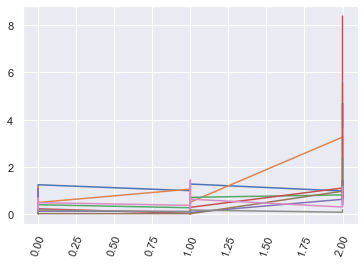

In [17]:



num_cols = ['Bearing 1']
merged_data.columns = ['Bearing 1-1','Bearing 1-2','Bearing 2-1','Bearing 2-2', 'Bearing 3-1','Bearing 3-2','Bearing 4-1','Bearing 4-2', 'FaultType']
merged_data.reset_index(drop=True, inplace=True)
#merged_data.index = pd.to_datetime(merged_data.index, format='%Y.%m.%d.%H.%M.%S')
#merged_data.index = pd.to_datetime(merged_data.index, format='UTC')
#merged_data = merged_data.sort_index()
merged_data.to_csv('Imb1.csv')
#merged_data.index.names = ['index']
#merged_data.head()
num_cols = ['Bearing 1-1','Bearing 1-2','Bearing 2-1','Bearing 2-2', 'Bearing 3-1','Bearing 3-2','Bearing 4-1','Bearing 4-2']

dataset_train = merged_data #['2004-02-12 11:02:39':'2004-02-13 23:52:39']
#dataset_test = merged_data['2004-02-13 23:52:39':]
#dataset_train.plot(merged_data.loc[:,"date"], merged_data.loc[:,"Bearing 1"], figsize = (12,6))
plt.plot(merged_data["FaultType"], merged_data[num_cols])
plt.xticks(rotation=70)


In [6]:
import tensorflow as tf
tf.test.is_gpu_available()


False

In [18]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
# load dataset

dataset = merged_data.values
X = dataset[:,0:8].astype(float)
Y = dataset[:,8]
print(X)
print(Y)

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

 
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(16, input_dim=8, activation='relu'))
	model.add(Dense(3, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
 
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=1)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[[0.98038211 0.85148049 0.26475109 ... 0.02546794 0.15975002 0.09202422]
 [0.99154874 1.07695191 0.26608685 ... 0.02531368 0.2352439  0.09442421]
 [1.0022057  1.15037837 0.26322633 ... 0.02629123 0.15823532 0.10757607]
 ...
 [1.32612566 5.37353754 3.56242281 ... 1.08892829 0.98458444 0.19145801]
 [1.32911128 5.45874527 3.51868437 ... 1.16061971 1.00961151 0.19184363]
 [1.4188841  5.556572   3.65535901 ... 1.14475626 1.00621834 0.1911025 ]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2.]
Epoch 1/200
132/132 [==============================] - 1s 5ms/step - loss: 0.8753 - accuracy: 0.4848 
Epoch

132/132 [==============================] - 0s 129us/step - loss: 0.0346 - accuracy: 0.9924
Epoch 150/200
132/132 [==============================] - 0s 128us/step - loss: 0.0336 - accuracy: 0.9924
Epoch 151/200
132/132 [==============================] - 0s 144us/step - loss: 0.0341 - accuracy: 0.9848
Epoch 152/200
132/132 [==============================] - 0s 166us/step - loss: 0.0328 - accuracy: 0.9924
Epoch 153/200
132/132 [==============================] - 0s 136us/step - loss: 0.0324 - accuracy: 0.9848
Epoch 154/200
132/132 [==============================] - 0s 113us/step - loss: 0.0330 - accuracy: 0.9848
Epoch 155/200
132/132 [==============================] - 0s 121us/step - loss: 0.0319 - accuracy: 1.0000
Epoch 156/200
132/132 [==============================] - 0s 113us/step - loss: 0.0317 - accuracy: 1.0000
Epoch 157/200
132/132 [==============================] - 0s 136us/step - loss: 0.0313 - accuracy: 1.0000
Epoch 158/200
132/132 [==============================] - 0s 129us/ste

Epoch 27/200
132/132 [==============================] - 0s 128us/step - loss: 0.3477 - accuracy: 0.9167
Epoch 28/200
132/132 [==============================] - 0s 136us/step - loss: 0.3378 - accuracy: 0.9167
Epoch 29/200
132/132 [==============================] - 0s 128us/step - loss: 0.3306 - accuracy: 0.9167
Epoch 30/200
132/132 [==============================] - 0s 144us/step - loss: 0.3221 - accuracy: 0.9167
Epoch 31/200
132/132 [==============================] - 0s 144us/step - loss: 0.3149 - accuracy: 0.9242
Epoch 32/200
132/132 [==============================] - 0s 159us/step - loss: 0.3077 - accuracy: 0.9242
Epoch 33/200
132/132 [==============================] - 0s 151us/step - loss: 0.3010 - accuracy: 0.9242
Epoch 34/200
132/132 [==============================] - 0s 151us/step - loss: 0.2949 - accuracy: 0.9167
Epoch 35/200
132/132 [==============================] - 0s 144us/step - loss: 0.2870 - accuracy: 0.9242
Epoch 36/200
132/132 [==============================] - 0s 128us

132/132 [==============================] - 0s 144us/step - loss: 0.0458 - accuracy: 0.9848
Epoch 183/200
132/132 [==============================] - 0s 181us/step - loss: 0.0459 - accuracy: 0.9848
Epoch 184/200
132/132 [==============================] - 0s 219us/step - loss: 0.0454 - accuracy: 0.9848
Epoch 185/200
132/132 [==============================] - 0s 234us/step - loss: 0.0456 - accuracy: 0.9848
Epoch 186/200
132/132 [==============================] - 0s 174us/step - loss: 0.0442 - accuracy: 0.9848
Epoch 187/200
132/132 [==============================] - 0s 174us/step - loss: 0.0459 - accuracy: 0.9848
Epoch 188/200
132/132 [==============================] - 0s 181us/step - loss: 0.0437 - accuracy: 0.9848
Epoch 189/200
132/132 [==============================] - 0s 174us/step - loss: 0.0433 - accuracy: 0.9848
Epoch 190/200
132/132 [==============================] - 0s 181us/step - loss: 0.0429 - accuracy: 0.9848
Epoch 191/200
132/132 [==============================] - 0s 151us/ste

132/132 [==============================] - 0s 144us/step - loss: 0.0623 - accuracy: 0.9848
Epoch 139/200
132/132 [==============================] - 0s 144us/step - loss: 0.0637 - accuracy: 0.9848
Epoch 140/200
132/132 [==============================] - 0s 144us/step - loss: 0.0603 - accuracy: 0.9848
Epoch 141/200
132/132 [==============================] - 0s 144us/step - loss: 0.0603 - accuracy: 0.9848
Epoch 142/200
132/132 [==============================] - 0s 151us/step - loss: 0.0601 - accuracy: 0.9848
Epoch 143/200
132/132 [==============================] - 0s 144us/step - loss: 0.0583 - accuracy: 0.9848
Epoch 144/200
132/132 [==============================] - 0s 166us/step - loss: 0.0576 - accuracy: 0.9848
Epoch 145/200
132/132 [==============================] - 0s 144us/step - loss: 0.0576 - accuracy: 0.9848
Epoch 146/200
132/132 [==============================] - 0s 136us/step - loss: 0.0567 - accuracy: 0.9848
Epoch 147/200
132/132 [==============================] - 0s 151us/ste

132/132 [==============================] - 0s 166us/step - loss: 0.0895 - accuracy: 0.9773
Epoch 94/200
132/132 [==============================] - 0s 151us/step - loss: 0.0889 - accuracy: 0.9773
Epoch 95/200
132/132 [==============================] - 0s 136us/step - loss: 0.0869 - accuracy: 0.9773
Epoch 96/200
132/132 [==============================] - 0s 159us/step - loss: 0.0861 - accuracy: 0.9773
Epoch 97/200
132/132 [==============================] - 0s 136us/step - loss: 0.0854 - accuracy: 0.9773
Epoch 98/200
132/132 [==============================] - 0s 128us/step - loss: 0.0843 - accuracy: 0.9773
Epoch 99/200
132/132 [==============================] - 0s 144us/step - loss: 0.0831 - accuracy: 0.9773
Epoch 100/200
132/132 [==============================] - 0s 136us/step - loss: 0.0817 - accuracy: 0.9773
Epoch 101/200
132/132 [==============================] - 0s 151us/step - loss: 0.0812 - accuracy: 0.9773
Epoch 102/200
132/132 [==============================] - 0s 144us/step - lo

132/132 [==============================] - 0s 144us/step - loss: 0.1815 - accuracy: 0.9545
Epoch 50/200
132/132 [==============================] - 0s 144us/step - loss: 0.1772 - accuracy: 0.9545
Epoch 51/200
132/132 [==============================] - 0s 144us/step - loss: 0.1749 - accuracy: 0.9470
Epoch 52/200
132/132 [==============================] - 0s 136us/step - loss: 0.1709 - accuracy: 0.9545
Epoch 53/200
132/132 [==============================] - 0s 136us/step - loss: 0.1671 - accuracy: 0.9545
Epoch 54/200
132/132 [==============================] - 0s 136us/step - loss: 0.1657 - accuracy: 0.9545
Epoch 55/200
132/132 [==============================] - 0s 144us/step - loss: 0.1617 - accuracy: 0.9545
Epoch 56/200
132/132 [==============================] - 0s 151us/step - loss: 0.1591 - accuracy: 0.9470
Epoch 57/200
132/132 [==============================] - 0s 136us/step - loss: 0.1556 - accuracy: 0.9621
Epoch 58/200
132/132 [==============================] - 0s 159us/step - loss:

132/132 [==============================] - 0s 151us/step - loss: 1.2209 - accuracy: 0.5985
Epoch 5/200
132/132 [==============================] - 0s 159us/step - loss: 0.9608 - accuracy: 0.7273
Epoch 6/200
132/132 [==============================] - 0s 159us/step - loss: 0.7899 - accuracy: 0.9091
Epoch 7/200
132/132 [==============================] - 0s 151us/step - loss: 0.6902 - accuracy: 0.9545
Epoch 8/200
132/132 [==============================] - 0s 151us/step - loss: 0.6261 - accuracy: 0.9773
Epoch 9/200
132/132 [==============================] - 0s 151us/step - loss: 0.5717 - accuracy: 0.9848
Epoch 10/200
132/132 [==============================] - 0s 128us/step - loss: 0.5210 - accuracy: 0.9848
Epoch 11/200
132/132 [==============================] - 0s 128us/step - loss: 0.4759 - accuracy: 0.9545
Epoch 12/200
132/132 [==============================] - 0s 136us/step - loss: 0.4372 - accuracy: 0.9697
Epoch 13/200
132/132 [==============================] - 0s 128us/step - loss: 0.40

Epoch 83/200
132/132 [==============================] - 0s 136us/step - loss: 0.0719 - accuracy: 0.9848
Epoch 84/200
132/132 [==============================] - 0s 166us/step - loss: 0.0710 - accuracy: 0.9848
Epoch 85/200
132/132 [==============================] - 0s 136us/step - loss: 0.0704 - accuracy: 0.9848
Epoch 86/200
132/132 [==============================] - 0s 128us/step - loss: 0.0690 - accuracy: 0.9848
Epoch 87/200
132/132 [==============================] - 0s 151us/step - loss: 0.0680 - accuracy: 0.9848
Epoch 88/200
132/132 [==============================] - 0s 121us/step - loss: 0.0674 - accuracy: 0.9848
Epoch 89/200
132/132 [==============================] - 0s 113us/step - loss: 0.0665 - accuracy: 0.9848
Epoch 90/200
132/132 [==============================] - 0s 128us/step - loss: 0.0658 - accuracy: 0.9848
Epoch 91/200
132/132 [==============================] - 0s 128us/step - loss: 0.0652 - accuracy: 0.9848
Epoch 92/200
132/132 [==============================] - 0s 136us

132/132 [==============================] - 0s 136us/step - loss: 0.2667 - accuracy: 0.9242
Epoch 40/200
132/132 [==============================] - 0s 159us/step - loss: 0.2600 - accuracy: 0.9242
Epoch 41/200
132/132 [==============================] - 0s 159us/step - loss: 0.2554 - accuracy: 0.9242
Epoch 42/200
132/132 [==============================] - 0s 159us/step - loss: 0.2493 - accuracy: 0.9242
Epoch 43/200
132/132 [==============================] - 0s 136us/step - loss: 0.2440 - accuracy: 0.9242
Epoch 44/200
132/132 [==============================] - 0s 144us/step - loss: 0.2379 - accuracy: 0.9242
Epoch 45/200
132/132 [==============================] - 0s 144us/step - loss: 0.2341 - accuracy: 0.9242
Epoch 46/200
132/132 [==============================] - 0s 151us/step - loss: 0.2278 - accuracy: 0.9242
Epoch 47/200
132/132 [==============================] - 0s 144us/step - loss: 0.2233 - accuracy: 0.9242
Epoch 48/200
132/132 [==============================] - 0s 136us/step - loss:

132/132 [==============================] - 0s 128us/step - loss: 0.0319 - accuracy: 0.9924
Epoch 196/200
132/132 [==============================] - 0s 136us/step - loss: 0.0310 - accuracy: 0.9924
Epoch 197/200
132/132 [==============================] - 0s 128us/step - loss: 0.0312 - accuracy: 0.9924
Epoch 198/200
132/132 [==============================] - 0s 136us/step - loss: 0.0314 - accuracy: 0.9924
Epoch 199/200
132/132 [==============================] - 0s 136us/step - loss: 0.0307 - accuracy: 0.9924
Epoch 200/200
15/15 [==============================] - ETA:  - 0s 864us/step
Epoch 1/200
133/133 [==============================] - 0s 495us/step - loss: 1.6988 - accuracy: 0.3233
Epoch 2/200
133/133 [==============================] - 0s 150us/step - loss: 1.3877 - accuracy: 0.3233
Epoch 3/200
133/133 [==============================] - 0s 135us/step - loss: 1.1791 - accuracy: 0.3308
Epoch 4/200
133/133 [==============================] - 0s 135us/step - loss: 1.0178 - accuracy: 0.4586


133/133 [==============================] - 0s 150us/step - loss: 0.0510 - accuracy: 0.9925
Epoch 152/200
133/133 [==============================] - 0s 112us/step - loss: 0.0501 - accuracy: 0.9925
Epoch 153/200
133/133 [==============================] - 0s 127us/step - loss: 0.0501 - accuracy: 0.9925
Epoch 154/200
133/133 [==============================] - 0s 120us/step - loss: 0.0492 - accuracy: 0.9925
Epoch 155/200
133/133 [==============================] - 0s 112us/step - loss: 0.0493 - accuracy: 0.9925
Epoch 156/200
133/133 [==============================] - 0s 127us/step - loss: 0.0482 - accuracy: 0.9925
Epoch 157/200
133/133 [==============================] - 0s 120us/step - loss: 0.0481 - accuracy: 0.9925
Epoch 158/200
133/133 [==============================] - 0s 135us/step - loss: 0.0480 - accuracy: 0.9925
Epoch 159/200
133/133 [==============================] - 0s 127us/step - loss: 0.0464 - accuracy: 0.9925
Epoch 160/200
133/133 [==============================] - 0s 127us/ste

Epoch 29/200
133/133 [==============================] - 0s 180us/step - loss: 0.3867 - accuracy: 0.9398
Epoch 30/200
133/133 [==============================] - 0s 150us/step - loss: 0.3756 - accuracy: 0.9474
Epoch 31/200
133/133 [==============================] - 0s 142us/step - loss: 0.3627 - accuracy: 0.9699
Epoch 32/200
133/133 [==============================] - 0s 135us/step - loss: 0.3519 - accuracy: 0.9774
Epoch 33/200
133/133 [==============================] - 0s 142us/step - loss: 0.3404 - accuracy: 0.9699
Epoch 34/200
133/133 [==============================] - 0s 157us/step - loss: 0.3305 - accuracy: 0.9774
Epoch 35/200
133/133 [==============================] - 0s 157us/step - loss: 0.3183 - accuracy: 0.9774
Epoch 36/200
133/133 [==============================] - 0s 157us/step - loss: 0.3092 - accuracy: 0.9850
Epoch 37/200
133/133 [==============================] - 0s 135us/step - loss: 0.2969 - accuracy: 0.9774
Epoch 38/200
133/133 [==============================] - 0s 135us

133/133 [==============================] - 0s 187us/step - loss: 0.0366 - accuracy: 0.9925
Epoch 185/200
133/133 [==============================] - 0s 157us/step - loss: 0.0359 - accuracy: 0.9925
Epoch 186/200
133/133 [==============================] - 0s 172us/step - loss: 0.0364 - accuracy: 0.9925
Epoch 187/200
133/133 [==============================] - 0s 172us/step - loss: 0.0356 - accuracy: 0.9925
Epoch 188/200
133/133 [==============================] - 0s 165us/step - loss: 0.0349 - accuracy: 0.9925
Epoch 189/200
133/133 [==============================] - 0s 165us/step - loss: 0.0349 - accuracy: 0.9925
Epoch 190/200
133/133 [==============================] - 0s 157us/step - loss: 0.0344 - accuracy: 0.9925
Epoch 191/200
133/133 [==============================] - 0s 150us/step - loss: 0.0342 - accuracy: 0.9925
Epoch 192/200
133/133 [==============================] - 0s 172us/step - loss: 0.0338 - accuracy: 0.9925
Epoch 193/200
133/133 [==============================] - 0s 172us/ste

133/133 [==============================] - 0s 150us/step - loss: 0.0418 - accuracy: 0.9925
Epoch 141/200
133/133 [==============================] - 0s 158us/step - loss: 0.0415 - accuracy: 0.9925
Epoch 142/200
133/133 [==============================] - 0s 157us/step - loss: 0.0409 - accuracy: 1.0000
Epoch 143/200
133/133 [==============================] - 0s 127us/step - loss: 0.0413 - accuracy: 1.0000
Epoch 144/200
133/133 [==============================] - 0s 172us/step - loss: 0.0398 - accuracy: 0.9925
Epoch 145/200
133/133 [==============================] - 0s 142us/step - loss: 0.0399 - accuracy: 0.9925
Epoch 146/200
133/133 [==============================] - 0s 135us/step - loss: 0.0394 - accuracy: 0.9925
Epoch 147/200
133/133 [==============================] - 0s 127us/step - loss: 0.0389 - accuracy: 1.0000
Epoch 148/200
133/133 [==============================] - 0s 135us/step - loss: 0.0383 - accuracy: 1.0000
Epoch 149/200
133/133 [==============================] - 0s 135us/ste

In [90]:

#mod = baseline_model()
Xnew = np.array([4.6097,0.79182,0.40115,0.09155,0.45266,0.04845,0.24753,0.11269]).T
Xnew1 = Xnew.reshape(8,1)
print(Xnew1)
estimator.fit(X,dummy_y)
print(estimator.predict(Xnew1))
#print(estimator.predict_classes(Xnew1))
#print(ynew)

[[4.6097 ]
 [0.79182]
 [0.40115]
 [0.09155]
 [0.45266]
 [0.04845]
 [0.24753]
 [0.11269]]
Epoch 1/200
147/147 [==============================] - 0s 495us/step - loss: 1.3638 - accuracy: 0.2381
Epoch 2/200
147/147 [==============================] - 0s 163us/step - loss: 1.1034 - accuracy: 0.0952
Epoch 3/200
147/147 [==============================] - 0s 163us/step - loss: 0.9676 - accuracy: 0.3333
Epoch 4/200
147/147 [==============================] - 0s 149us/step - loss: 0.9021 - accuracy: 0.3333
Epoch 5/200
147/147 [==============================] - 0s 163us/step - loss: 0.8461 - accuracy: 0.3333
Epoch 6/200
147/147 [==============================] - 0s 136us/step - loss: 0.7984 - accuracy: 0.5646
Epoch 7/200
147/147 [==============================] - 0s 170us/step - loss: 0.7589 - accuracy: 0.7483
Epoch 8/200
147/147 [==============================] - 0s 142us/step - loss: 0.7254 - accuracy: 0.7687
Epoch 9/200
147/147 [==============================] - 0s 149us/step - loss: 0.6921 - a

147/147 [==============================] - 0s 129us/step - loss: 0.1030 - accuracy: 0.9796
Epoch 80/200
147/147 [==============================] - 0s 142us/step - loss: 0.1006 - accuracy: 0.9796
Epoch 81/200
147/147 [==============================] - 0s 149us/step - loss: 0.0995 - accuracy: 0.9728
Epoch 82/200
147/147 [==============================] - 0s 156us/step - loss: 0.0991 - accuracy: 0.9728
Epoch 83/200
147/147 [==============================] - 0s 156us/step - loss: 0.0956 - accuracy: 0.9796
Epoch 84/200
147/147 [==============================] - 0s 190us/step - loss: 0.0940 - accuracy: 0.9796
Epoch 85/200
147/147 [==============================] - 0s 156us/step - loss: 0.0936 - accuracy: 0.9796
Epoch 86/200
147/147 [==============================] - 0s 142us/step - loss: 0.0922 - accuracy: 0.9864
Epoch 87/200
147/147 [==============================] - 0s 163us/step - loss: 0.0906 - accuracy: 0.9796
Epoch 88/200
147/147 [==============================] - 0s 170us/step - loss:

ValueError: Error when checking input: expected dense_157_input to have shape (8,) but got array with shape (1,)

In [104]:

Xnew = np.array([4.6097,0.79182,0.40115,0.09155,0.45266,0.04845,0.24753,0.11269])
Xnew1 = Xnew.reshape(1,8)
#Xnew1.shape()
print(Xnew1)

print(estimator.predict(Xnew1))   # Predict unknown data point 


[[4.6097  0.79182 0.40115 0.09155 0.45266 0.04845 0.24753 0.11269]]
1/1 [==============================] - 0s 997us/step
[0]


In [105]:
Xnew = np.array([0.5161,4.8619,0.11371,2.2643,0.91935,2.3923,0.27112,0.073815
])
Xnew1 = Xnew.reshape(1,8)
#Xnew1.shape()
print(Xnew1)

print(estimator.predict(Xnew1))

[[0.5161   4.8619   0.11371  2.2643   0.91935  2.3923   0.27112  0.073815]]
1/1 [==============================] - 0s 0us/step
[2]
